In [2]:
import seaborn as sns

sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
##더미변수 처리
import pandas as pd
tips = pd.get_dummies(tips, columns=['sex', 'smoker', 'day', 'time'])
tips.head()

,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,1.01,2,0,1,0,1,0,0,0,1,0,1
1,10.34,1.66,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3.50,3,1,0,0,1,0,0,0,1,0,1
3,23.68,3.31,2,1,0,0,1,0,0,0,1,0,1
4,24.59,3.61,4,0,1,0,1,0,0,0,1,0,1


In [5]:
# 컬럼 순서 변경(목적에 맞게)

tips = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
             'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner', 'tip']]
tips.head()

,total_bill,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner,tip
0,16.99,2,0,1,0,1,0,0,0,1,0,1,1.01
1,10.34,3,1,0,0,1,0,0,0,1,0,1,1.66
2,21.01,3,1,0,0,1,0,0,0,1,0,1,3.50
3,23.68,2,1,0,0,1,0,0,0,1,0,1,3.31
4,24.59,4,0,1,0,1,0,0,0,1,0,1,3.61


### 선형 회귀

- 선형 방정식, 다변수 일차방정식
=> 선형 방정식을 통해 회귀 문제를 푼다

### 표기법

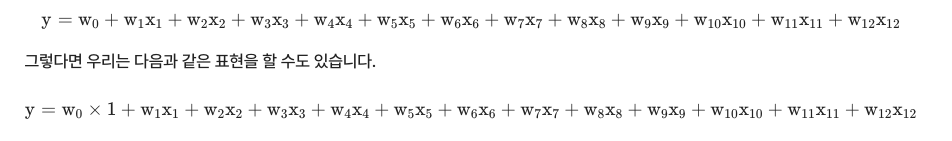

### 손실함수

In [6]:
X = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
          'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner']].values
y = tips['tip'].values

In [7]:
## train, test 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(195, 12) (195,)
(49, 12) (49,)


In [8]:
import numpy as np
W = np.random.rand(12)
b = np.random.rand()

In [9]:
W

array([0.10992837, 0.37295068, 0.43643445, 0.26488309, 0.97191145,
       0.95525083, 0.87269916, 0.45624641, 0.19389547, 0.51758034,
       0.21856148, 0.28631702])

In [10]:
b

0.19144245504486646

In [11]:
def model(X, W, b):
    predictions = 0
    for i in range(12):
        predictions += X[:, i]* W[i]
    predictions += b
    return predictions


In [12]:
def MSE(a,b):
    mse = ((a-b)**2).mean()
    return mse



In [13]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L


## 직접 그래디언트 계산

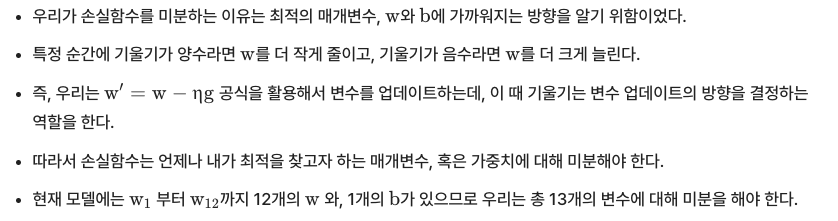

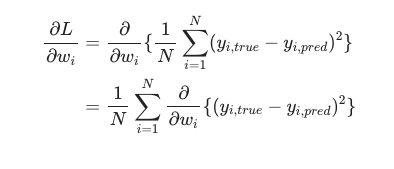

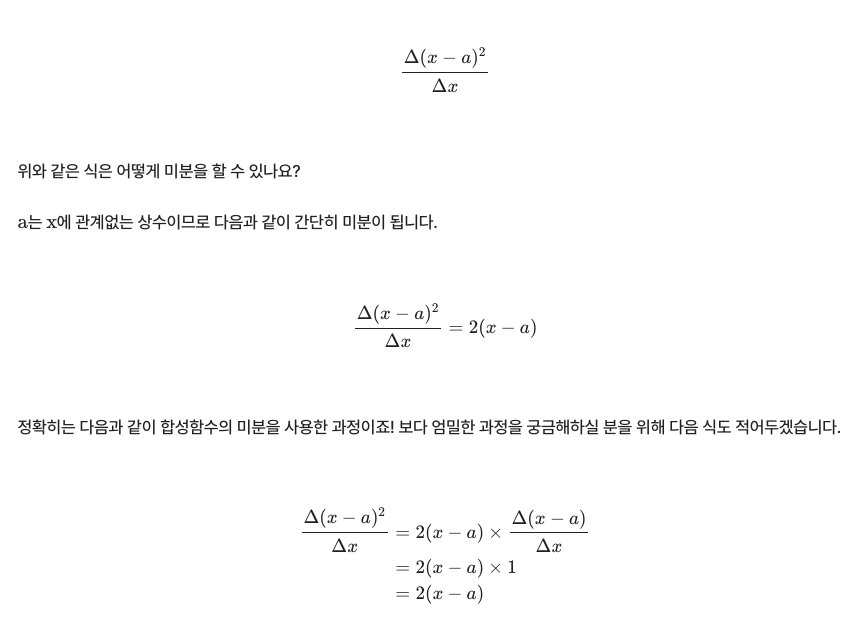

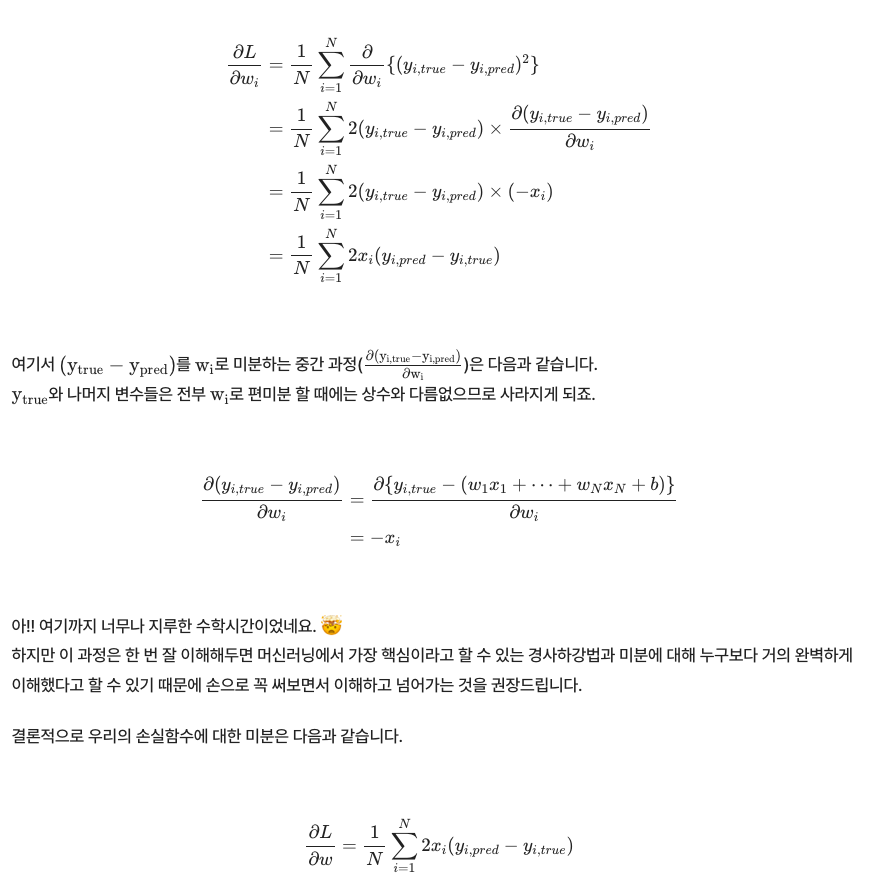

In [14]:
def gradient(X, W, b, y):
    N = len(y) # 데이터 포인터 개수
    y_pred = model(X, W, b)
    dW = 1/N * 2 * X.T.dot(y_pred - y)
    db = 2 * (y_pred - y ).mean()
    
    return dW, db


In [15]:
dW, db = gradient(X, W, b, y)
print(dW)
print(db)

[100.05855734  12.94070997   3.20856562   1.62841484   1.83422563
   3.00275483   1.36106307   0.33771537   1.5752436    1.56295842
   1.45339444   3.38358602]
4.836980460433229


## 모델 학습

In [16]:
LEARNING_RATE = 0.0001

In [18]:
losses = []

for i in range(1, 1001):
    dW, db = gradient(X, W, b, y)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print(f'Iteration{i} : Loss {L:0.04}')

Iteration10 : Loss 2.306
Iteration20 : Loss 1.759
Iteration30 : Loss 1.706
Iteration40 : Loss 1.705
Iteration50 : Loss 1.705
Iteration60 : Loss 1.705
Iteration70 : Loss 1.703
Iteration80 : Loss 1.702
Iteration90 : Loss 1.7
Iteration100 : Loss 1.698
Iteration110 : Loss 1.696
Iteration120 : Loss 1.694
Iteration130 : Loss 1.692
Iteration140 : Loss 1.69
Iteration150 : Loss 1.688
Iteration160 : Loss 1.686
Iteration170 : Loss 1.684
Iteration180 : Loss 1.682
Iteration190 : Loss 1.68
Iteration200 : Loss 1.678
Iteration210 : Loss 1.676
Iteration220 : Loss 1.674
Iteration230 : Loss 1.672
Iteration240 : Loss 1.67
Iteration250 : Loss 1.668
Iteration260 : Loss 1.666
Iteration270 : Loss 1.664
Iteration280 : Loss 1.663
Iteration290 : Loss 1.661
Iteration300 : Loss 1.659
Iteration310 : Loss 1.657
Iteration320 : Loss 1.655
Iteration330 : Loss 1.653
Iteration340 : Loss 1.651
Iteration350 : Loss 1.65
Iteration360 : Loss 1.648
Iteration370 : Loss 1.646
Iteration380 : Loss 1.644
Iteration390 : Loss 1.642
I

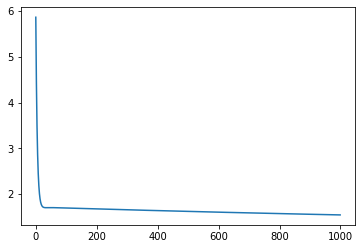

In [19]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [20]:
W, b

(array([0.02241119, 0.271898  , 0.39997867, 0.24060261, 0.95512176,
        0.91130426, 0.83455149, 0.45092178, 0.19066076, 0.5035511 ,
        0.17767728, 0.26646497]),
 0.13070620209775285)

In [21]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

1.1750000446308637

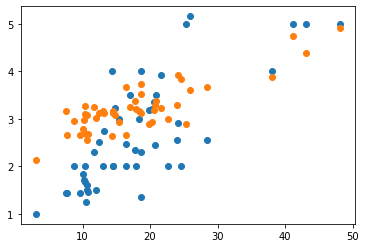

In [22]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

## sklearn 사용 

In [23]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [24]:
model.fit(X_train, y_train)


LinearRegression()

In [25]:
predictions = model.predict(X_test)
predictions

array([2.91436632, 2.00292613, 3.96425583, 3.76380832, 2.14836306,
       2.67423448, 3.63934628, 2.29147245, 2.57207155, 2.45851225,
       2.90446763, 2.0573337 , 2.11817193, 2.35130838, 1.82976215,
       3.10830675, 2.95140176, 3.21602976, 2.56640892, 5.73957295,
       3.43490366, 3.22645102, 2.17139823, 1.94180002, 3.16394533,
       2.24547894, 2.14497574, 3.21025435, 3.20097595, 6.66803147,
       5.01111235, 1.57804024, 3.1909877 , 2.76652194, 2.98412862,
       3.85695724, 2.17008741, 5.46673999, 2.35586827, 2.99190732,
       2.03271177, 2.48465991, 3.44046814, 2.35532237, 1.92528104,
       0.87348926, 1.81911521, 3.04083954, 1.85436902])

In [26]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
mse

0.7033566017436103

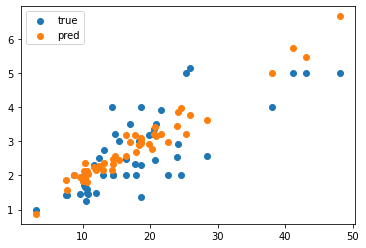

In [27]:
plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], predictions, label="pred")
plt.legend()
plt.show()

## 정리


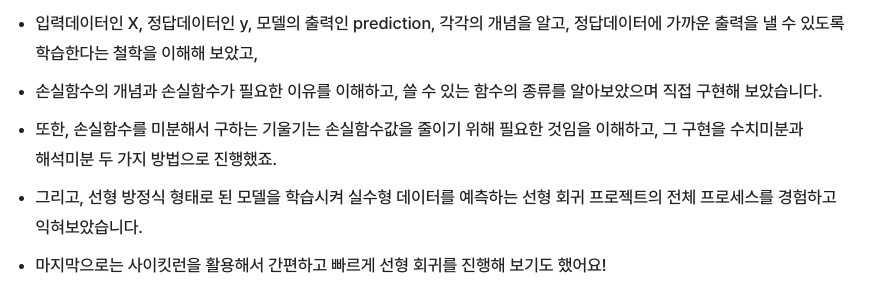